### Importation des librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

### Récupération des données dans le fichier news.csv
On en profite pour afficher les dimensions du dataframe et on affiche les cinq premières valeurs.

In [2]:
data = pd.read_csv("news.csv");

print("Shape: ", data.shape, "\n")
print("Dataset head: \n")
data.head()

Shape:  (6335, 4) 

Dataset head: 



,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


### Récupération des labels

In [3]:
labels = data.label

print("Shape: ", labels.shape, "\n")
print("Dataset head: \n")
labels.head()

Shape:  (6335,) 

Dataset head: 



0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

### Création des différentes variables de test de train avec train_test_split

In [4]:
x_train, x_test, y_train, y_test = train_test_split(data['text'], labels, test_size=0.2, random_state=7)

### Initialisation d'un TF-IDF Vectorizer
Les collections seront transformées en matrices TF-IDF. De plus, cela va permettre de filtrer les mots anglais les plus courants afin de garder une matrice avec les données du langage naturel.

In [5]:
tfidf_vect = TfidfVectorizer(stop_words='english', max_df=0.7)

### Transformation du train set et du test set

In [6]:
tf_train = tfidf_vect.fit_transform(x_train)
tf_test = tfidf_vect.transform(x_test)
tf_test.shape

(1267, 61651)

### Initialisation d'un PassiveAggressiveClassifier
On test ensuite la précision du modèle.

In [7]:
pa_c = PassiveAggressiveClassifier(max_iter=50)
pa_c.fit(tf_train, y_train)

y_pred = pa_c.predict(tf_test)
score = accuracy_score(y_test, y_pred)
print(f"Précision: {round(score*100,2)}%")

Précision: 92.11%


### Création d'une matrice de confusion

In [8]:
cm = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

### Pour pousser l'analyse un peu plus loin

[[585  53]
 [ 47 582]]


<AxesSubplot:>

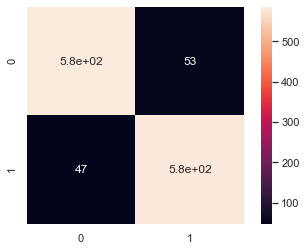

In [10]:
sns.set()
print(cm)
sns.heatmap(cm, square=True, annot=True)